In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1,columns=['id','accommodates','price','amenities','neighbourhood_cleansed','review_scores_rating'])
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
0,43920083,5,128,"[""Board games"", ""Kitchen"", ""Baby bath"", ""Dishw...",Lambeth,100.0
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
2,392246,2,39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Greenwich,99.0
3,30054179,3,85,"[""TV"", ""Essentials"", ""Kitchen"", ""Free parking ...",Lambeth,NaN
4,29098736,1,40,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Wandsworth,100.0


In [5]:
y=df_listings[df_listings['id']==14300858]
y

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
10749,14300858,4,67,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Smart lo...",Kensington and Chelsea,89.0


In [6]:
df_listings.shape

(30000, 6)

In [7]:
df_listings['neighbourhood_cleansed']

0                       Lambeth
1                   Westminster
2                     Greenwich
3                       Lambeth
4                    Wandsworth
                  ...          
29995    Kensington and Chelsea
29996                 Southwark
29997                    Ealing
29998    Kensington and Chelsea
29999                   Hackney
Name: neighbourhood_cleansed, Length: 30000, dtype: object

In [8]:
df_listings.dtypes

id                          int64
accommodates                int64
price                       int64
amenities                  object
neighbourhood_cleansed     object
review_scores_rating      float64
dtype: object

In [9]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [11]:
#remove the NAN values 
df_listings.dropna(how='any',inplace=True)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30000 non-null  int64  
 1   accommodates            30000 non-null  int64  
 2   price                   30000 non-null  int64  
 3   amenities               30000 non-null  object 
 4   neighbourhood_cleansed  30000 non-null  object 
 5   review_scores_rating    30000 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.6+ MB


In [12]:
df_listings=df_listings[(df_listings['accommodates']<=4)]  
df_listings = df_listings[df_listings['neighbourhood_cleansed'].isin(['Kensington and Chelsea','Westminster'])]
df_listings

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
5,38738454,4,200,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Kensington and Chelsea,100.0
6,4815852,2,57,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...",Westminster,90.0
12,3338480,2,80,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Westminster,99.0
14,356978,2,42,"[""TV"", ""Essentials"", ""Kitchen"", ""Paid parking ...",Westminster,89.0
...,...,...,...,...,...,...
29974,34269677,1,75,"[""Extra pillows and blankets"", ""Essentials"", ""...",Westminster,100.0
29982,45452509,4,50,"[""Kitchen"", ""Hangers"", ""Private entrance"", ""Lo...",Westminster,100.0
29991,887283,2,80,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",Kensington and Chelsea,93.0
29995,39646622,2,112,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Kensington and Chelsea,80.0


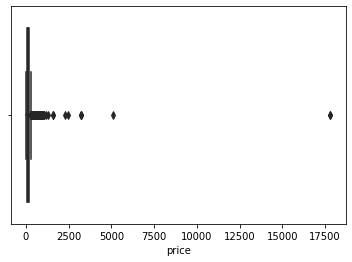

In [13]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

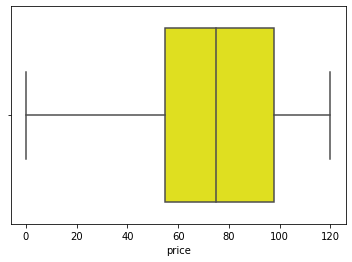

In [14]:

df_listings_boxplot = df_listings[df_listings['price'] <=120]

boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [15]:
df_listings=df_listings[df_listings['price'].between(65,75)]
df_listings.shape[0]

411

In [16]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Cooki..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","""[\""Dishwasher\"", \""Kitchen\"", \""Host greets y..."


In [17]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()

,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","[Kitchen, Host greets you, Hangers, Fire extin..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","[TV, Essentials, Kitchen, Washer, Hangers, Fir..."
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","[TV, Essentials, Kitchen, Cooking basics, Wash..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","[Kitchen, Host greets you, Hangers, Private en..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","[Dishwasher, Kitchen, Host greets you, Hangers..."


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

KeyError: ignored

In [ ]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

In [ ]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]),c=df_amenities['availability_cluster'])
plt.show()


In [ ]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [ ]:
xx=x_final.copy()
xx['lessential_amen']=xx['Wifi']+xx['Essentials']+xx['Smoke alarm']+xx['Heating']+xx['Long term stays allowed']+xx['Iron']+xx['Kitchen']
xx['2common_amen']=xx['Shampoo']+xx['Dedicated workspace']+xx['TV']+xx['Carbon monoxide alarm']
xx['3upgraded_amen']=xx['Private entrance']+xx['Elevator']+xx['Host greets you']
xx['4other_amen']=xx['Dryer']+xx['Fire extinguisher']+xx['Cooking basics']+xx['Dishes and silverware']+xx['Refrigerator']+xx['Bed linens']+xx['Stove']++xx['Microwave']+xx['Oven']+xx['First aid kit']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()



In [ ]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/r2.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/r2.csv')

In [ ]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/r2.csv')


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

In [ ]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [ ]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/r2.csv')

In [ ]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

In [ ]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [ ]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

In [ ]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

In [ ]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

In [ ]:
sns.distplot(model.resid)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

In [ ]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

In [ ]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

In [19]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Kitchen': 342,
 'Host greets you': 75,
 'Hangers': 330,
 'Fire extinguisher': 162,
 'Lock on bedroom door': 88,
 'Long term stays allowed': 355,
 'Wifi': 388,
 'Carbon monoxide alarm': 226,
 'Heating': 377,
 'Essentials': 386,
 'Washer': 298,
 'Hair dryer': 308,
 'First aid kit': 118,
 'Elevator': 83,
 'Dedicated workspace': 267,
 'Iron': 317,
 'Shampoo': 290,
 'Hot water': 234,
 'Luggage dropoff allowed': 64,
 'Smoke alarm': 358,
 'Dryer': 164,
 'TV': 246,
 'Cooking basics': 160,
 'Lockbox': 60,
 'Private entrance': 85,
 'Paid parking off premises': 58,
 'Dishwasher': 53,
 'Microwave': 128,
 'TV with standard cable': 26,
 'Refrigerator': 153,
 'Coffee maker': 66,
 'Oven': 124,
 'Dishes and silverware': 160,
 'Stove': 132,
 'Cable TV': 51,
 'Breakfast': 43,
 'Bed linens': 151,
 'Bathtub': 22,
 'EV charger': 3,
 'Single level home': 22,
 'Extra pillows and blankets': 71,
 'Air conditioning': 33,
 'Patio or balcony': 26,
 'Paid parking on premises': 17,
 'Free street parking': 15,
 'Se

In [20]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [21]:
new_amen[-25:]


[('First aid kit', 118),
 ('Oven', 124),
 ('Microwave', 128),
 ('Stove', 132),
 ('Bed linens', 151),
 ('Refrigerator', 153),
 ('Cooking basics', 160),
 ('Dishes and silverware', 160),
 ('Fire extinguisher', 162),
 ('Dryer', 164),
 ('Carbon monoxide alarm', 226),
 ('Hot water', 234),
 ('TV', 246),
 ('Dedicated workspace', 267),
 ('Shampoo', 290),
 ('Washer', 298),
 ('Hair dryer', 308),
 ('Iron', 317),
 ('Hangers', 330),
 ('Kitchen', 342),
 ('Long term stays allowed', 355),
 ('Smoke alarm', 358),
 ('Heating', 377),
 ('Essentials', 386),
 ('Wifi', 388)]

In [22]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Dishwasher',
 'Paid parking off premises',
 'Lockbox',
 'Luggage dropoff allowed',
 'Coffee maker',
 'Extra pillows and blankets',
 'Host greets you',
 'Elevator',
 'Private entrance',
 'Lock on bedroom door']

In [23]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
1,91.0
26,0.0
224,90.0
281,100.0
408,95.0
...,...
29744,0.0
29919,90.0
29944,93.0
29974,100.0


In [27]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Dishwasher,Paid parking off premises,Lockbox,Luggage dropoff allowed,Coffee maker,Extra pillows and blankets,Host greets you,Elevator,Private entrance,Lock on bedroom door
1,91.0,0,0,0,0,0,0,0,0,0,0
26,0.0,0,0,0,0,0,0,0,0,0,0
224,90.0,0,0,0,0,0,0,0,0,0,0
281,100.0,0,0,0,0,0,0,0,0,0,0
408,95.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29744,0.0,0,0,0,0,0,0,0,0,0,0
29919,90.0,0,0,0,0,0,0,0,0,0,0
29944,93.0,0,0,0,0,0,0,0,0,0,0
29974,100.0,0,0,0,0,0,0,0,0,0,0


In [28]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Dishwasher,Paid parking off premises,Lockbox,Luggage dropoff allowed,Coffee maker,Extra pillows and blankets,Host greets you,Elevator,Private entrance,Lock on bedroom door
1,91.0,0,0,0,1,0,0,1,1,0,1
26,0.0,0,0,0,0,0,0,0,0,0,0
224,90.0,0,0,1,0,0,0,0,0,0,0
281,100.0,0,1,0,1,0,0,1,1,1,1
408,95.0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29744,0.0,0,0,0,0,0,0,0,0,0,0
29919,90.0,0,0,1,0,1,1,1,0,0,0
29944,93.0,0,1,0,1,0,1,0,0,1,0
29974,100.0,0,0,0,0,0,1,0,0,0,0


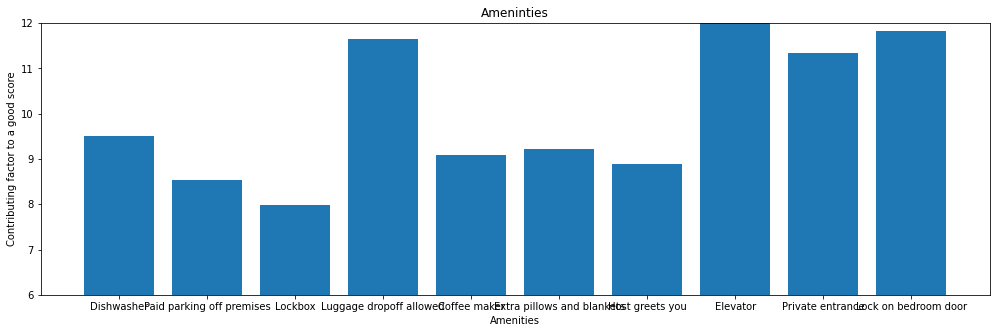

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)
feature_importance = etf.feature_importances_
feature_importance
for i in range(10):
    feature_importance[i] = feature_importance[i]*100
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()